# 전국 교통사고건수 예측하기

공공데이터를 통해 교통사고를 예측하는 프로젝트를 진행하고자 한다. ARIMA를 이용하여 시계열 분석을 해보자.

출처: https://kosis.kr/statHtml/statHtml.do?orgId=132&tblId=DT_V_MOTA_016&vw_cd=MT_ZTITLE&list_id=C_5&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do

# 목차

1. 데이터 읽기
2. 데이터 시각화
3. 데이터 전처리
4. 파라미터 찾기
5. 모델 학습
6. 모델 평가
7. 결론

# 데이터 읽기

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
df = pd.read_csv("Traffic_accident.csv", encoding='cp949')
df.head()

,시점,월별,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2005,1,2836,751,777,937,548,389,313,3334,578,527,630,687,762,1223,969,233
1,2005,2,2336,679,686,781,523,357,277,2690,497,468,582,612,683,1012,826,235
2,2005,3,3000,931,931,872,691,436,311,3387,607,606,644,788,784,1238,1096,258
3,2005,4,3287,1005,951,951,639,475,387,3516,662,647,737,863,858,1386,1216,237
4,2005,5,3379,1153,1066,1080,716,463,371,3956,733,695,762,918,922,1469,1158,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   시점      204 non-null    int64
 1   월별      204 non-null    int64
 2   서울      204 non-null    int64
 3   부산      204 non-null    int64
 4   대구      204 non-null    int64
 5   인천      204 non-null    int64
 6   광주      204 non-null    int64
 7   대전      204 non-null    int64
 8   울산      204 non-null    int64
 9   경기      204 non-null    int64
 10  강원      204 non-null    int64
 11  충북      204 non-null    int64
 12  충남      204 non-null    int64
 13  전북      204 non-null    int64
 14  전남      204 non-null    int64
 15  경북      204 non-null    int64
 16  경남      204 non-null    int64
 17  제주      204 non-null    int64
dtypes: int64(18)
memory usage: 28.8 KB


In [4]:
df.tail()

,시점,월별,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
199,2021,8,2778,862,968,642,622,556,299,4285,569,617,685,490,748,986,867,382
200,2021,9,2737,1000,981,646,615,615,329,4531,568,698,747,521,738,995,898,335
201,2021,10,2814,1003,1056,679,666,649,345,4855,619,728,811,588,823,1168,1006,423
202,2021,11,2925,998,1088,663,711,603,300,4819,563,692,770,577,760,1121,1032,403
203,2021,12,2869,906,992,677,647,567,307,4729,507,631,657,454,695,974,886,361


In [5]:
df.drop(['시점','월별'], inplace=True, axis=1)

In [6]:
# 날짜 칼럼 만들어주기
df_date = pd.date_range('2005-01','2022-1', freq='M')
df['date'] = df_date

# 데이터 시각화

<AxesSubplot:xlabel='제주'>

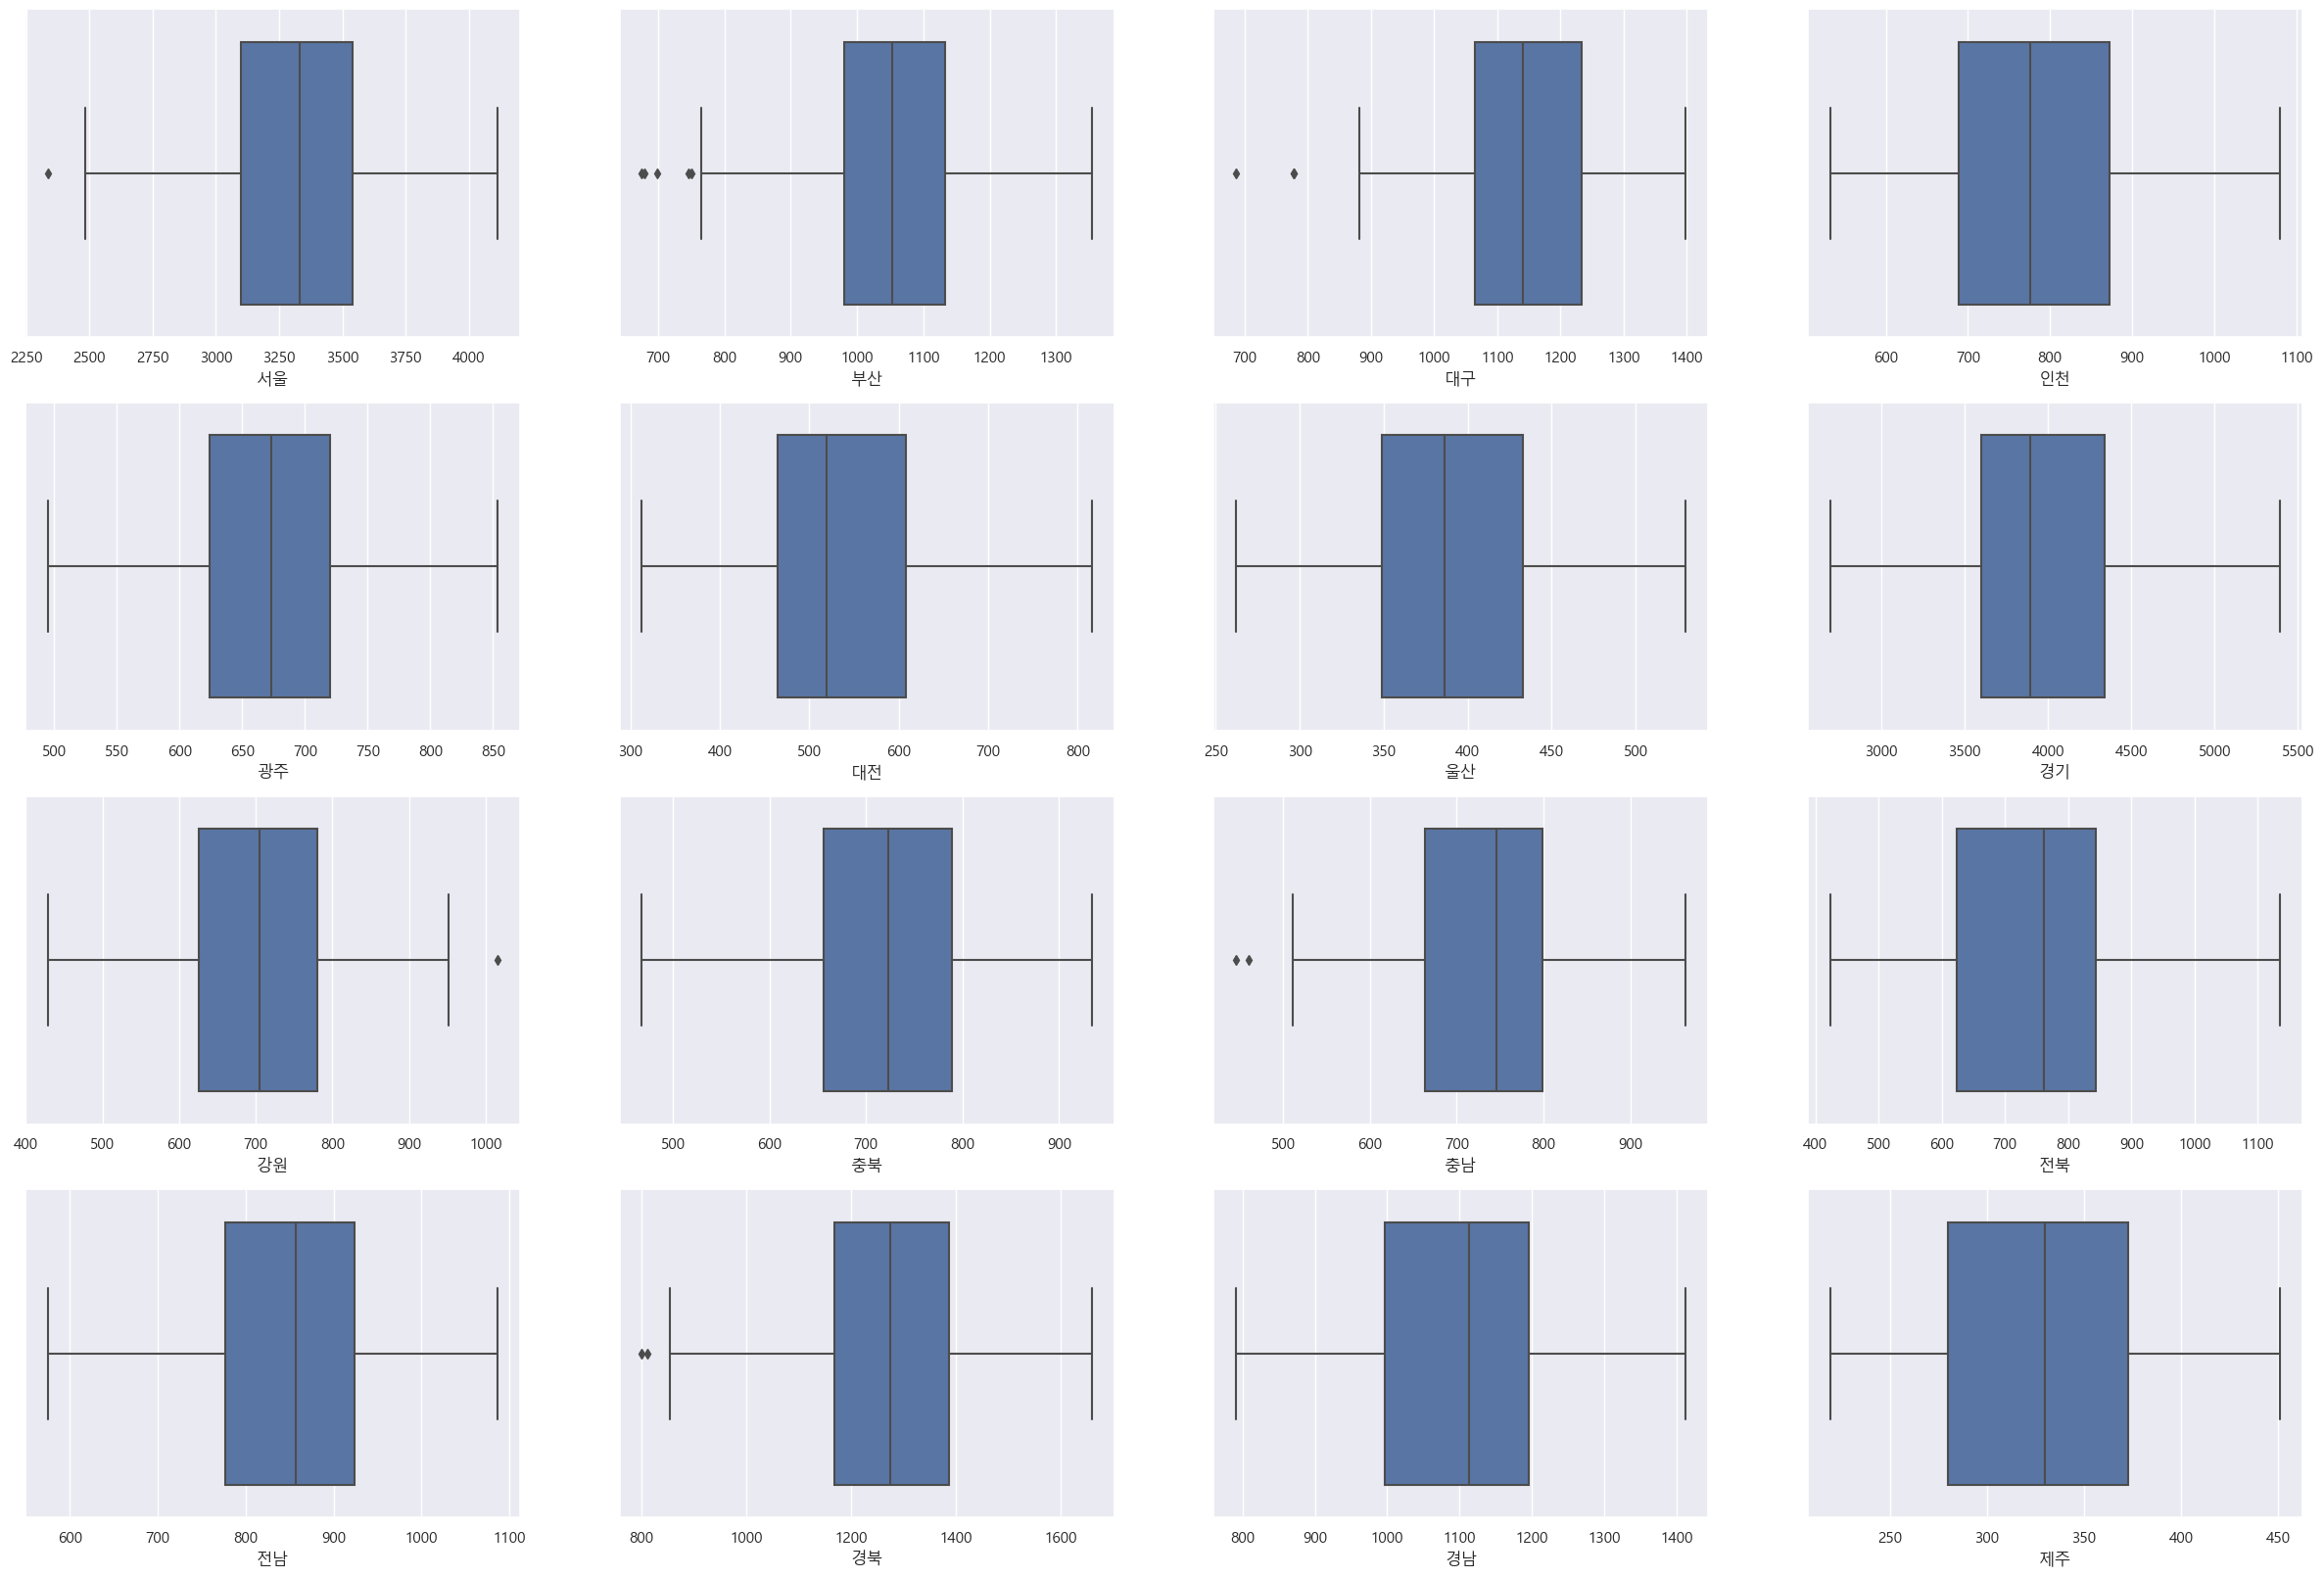

In [7]:
plt.figure(figsize=(30,20))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.subplot(4,4,1)
sns.boxplot(x = '서울',data = df)
plt.subplot(4,4,2)
sns.boxplot(x = '부산',data = df)
plt.subplot(4,4,3)
sns.boxplot(x = '대구',data = df)
plt.subplot(4,4,4)
sns.boxplot(x = '인천',data = df)
plt.subplot(4,4,5)
sns.boxplot(x = '광주',data = df)
plt.subplot(4,4,6)
sns.boxplot(x = '대전',data = df)
plt.subplot(4,4,7)
sns.boxplot(x = '울산',data = df)
plt.subplot(4,4,8)
sns.boxplot(x = '경기',data = df)
plt.subplot(4,4,9)
sns.boxplot(x = '강원',data = df)
plt.subplot(4,4,10)
sns.boxplot(x = '충북',data = df)
plt.subplot(4,4,11)
sns.boxplot(x = '충남',data = df)
plt.subplot(4,4,12)
sns.boxplot(x = '전북',data = df)
plt.subplot(4,4,13)
sns.boxplot(x = '전남',data = df)
plt.subplot(4,4,14)
sns.boxplot(x = '경북',data = df)
plt.subplot(4,4,15)
sns.boxplot(x = '경남',data = df)
plt.subplot(4,4,16)
sns.boxplot(x = '제주',data = df)

In [8]:
# 전국 데이터 만들기
df1 = df.sum(axis='columns')
df2 = pd.DataFrame(df1)
df2 = df2.rename(columns={0:'total'})
df2['date'] = df_date
df2.tail()

,total,date
199,16356,2021-08-31
200,16954,2021-09-30
201,18233,2021-10-31
202,18025,2021-11-30
203,16859,2021-12-31


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   total   204 non-null    int64         
 1   date    204 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.3 KB


<AxesSubplot:xlabel='total'>

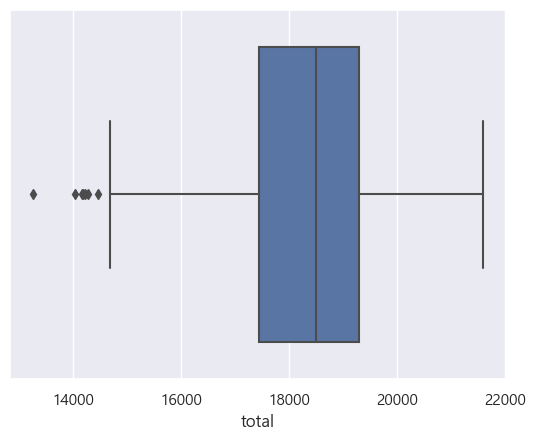

In [10]:
sns.boxplot(x = 'total',data = df2)

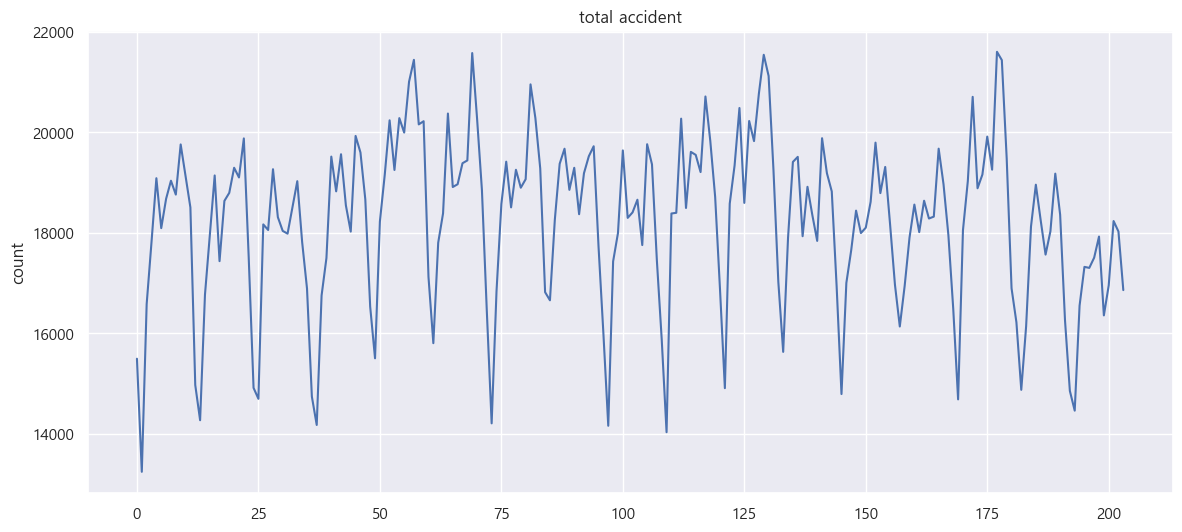

In [11]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df2['total'])

plt.grid(True, axis='y')
plt.title('total accident')
plt.ylabel('count')
plt.show()

# 데이터 전처리

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime
import statsmodels.tsa.api as tsa
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm

In [13]:
df2 = df2.set_index('date')

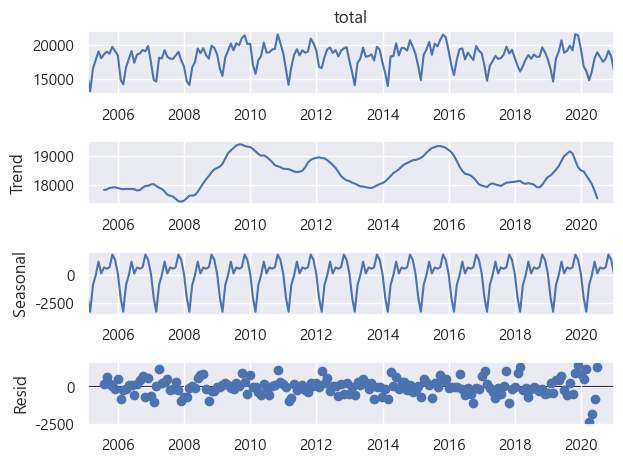

In [14]:
salesbymonth = df2.total.resample('M').sum()

# 2005-2020 데이터를 train으로 2021 데이터를 test로 분리
split = "2021-01-01"
salesbymonth_train= salesbymonth[:split]
salesbymonth_test= salesbymonth[split:]
salesbymonth_test_final=salesbymonth_test.copy()

# 데이터를 시즌별로 분해해서 살펴 본다.
decomposition = sm.tsa.seasonal_decompose(salesbymonth_train, model='additive')
fig = decomposition.plot()
plt.show()

사고 트랜드는 불규칙적이며 계절성에는 주기성이 있다.

# 파라미터 찾기

In [15]:
#방법 1. p,d,q의 조합을 만들어 ARIMA 모델을 돌려본다.
p = d = q = range(0, 2)

import itertools
pdqa = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdqa:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(salesbymonth_train, order=param, seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)                                
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4295.622548966656
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3906.4306778445216
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3033.250372865527
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2809.789677125951
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3050.775184736821
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3032.8394821912934
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2823.1667730399677
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2805.287711955166
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4139.22257721702
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3586.400321037854
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2976.176904347517
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2744.618880638493
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3872.53072838038
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2969.5771450420266
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2775.0871598600825
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2735.1015206510774
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3308.198876766971
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3024.8482946765307
ARIMA

C:\Users\komsco\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2875.6794588474104
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2703.517930736783
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2659.340528534379
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:3309.8243453028354
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3023.8040177439425
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2941.71718449725
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2673.2879770626014
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2927.4057820379994
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2869.803593095142
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2699.886996904582
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2675.029765670831
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:3255.048785430099
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2976.9841183949993
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2922.934490744052
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2645.336711182994
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2922.9743366038683
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2841.523012663275
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2698.321252013943
ARIM

In [16]:
#방법 2. auto_arima 함수로 자동 추출
from pmdarima import auto_arima
stepwise_model = auto_arima(salesbymonth_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2899.528, Time=0.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2993.321, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2923.775, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2897.825, Time=0.36 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2958.321, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2898.872, Time=0.76 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2898.917, Time=1.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2920.718, Time=0.27 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2928.265, Time=0.23 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2899.616, Time=0.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2902.518, Time=0.37 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=2898.144, Time=0.53 sec

Best model:  ARIMA(0,1,1)(0,

# 모델 학습

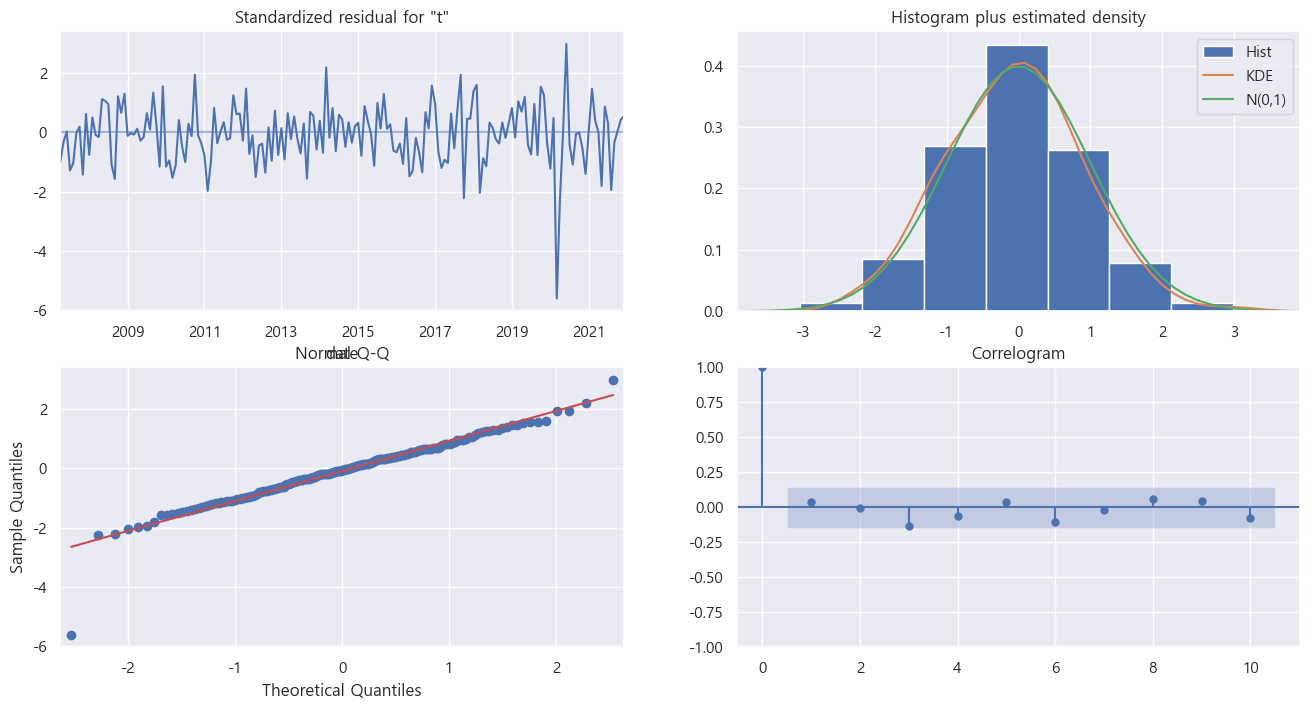

In [17]:
SARIMAMonth = sm.tsa.statespace.SARIMAX(salesbymonth, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12) ,enforce_stationarity=False,enforce_invertibility=False)

SARIMA_results_month = SARIMAMonth.fit()

SARIMA_results_month.plot_diagnostics(figsize=(16, 8))
plt.show()

Standardized residual은 잔차를 시계열로 그린 것으로 백색 잡음 답게 잔차의 시계열이 평균 0을 중심으로 무작위하게 움직이는 것을 볼 수 있다.



Histogram plus estimated density는 잔차의 히스토그램을 그려 정규 분포 N(0,1)과 밀도를 추정한 그래프를 같이 겹쳐서 보여준다. 위 비대칭도와 첨도에서 확인한 것처럼 정규분포와 비슷하게 대칭적이다.



Normal Q-Q그래프는 Q-Q 플랏으로 정규성을 만족한다면 빨간 일직선 위에 점들이 분포해야 한다. 그러나, 앞 쪽에서 빨간 선을 약간 벗어나는 모습을 보인다.


Correlogram은 잔차에 대한 ACF로 어느 정도 허용 범위 안에 위치하여 자기상관이 없음을 알 수 있다.

# 모델 평가

In [18]:
df2=df2.astype(float)

617.3135974008208


<AxesSubplot:xlabel='date'>

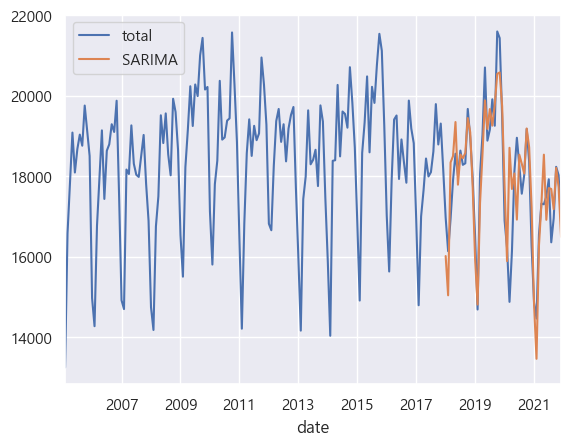

In [19]:
# 2021년 48개월 데이터로 예측하기
SARIMA_predict_month_1 = SARIMA_results_month.predict(start=156,end=204)

# 결과 비교를 위해 기존에 마련해둔 test데이터에 결과를 붙이기
df2['SARIMA'] = SARIMA_predict_month_1

# RMSE
RMSE_Month_SARIMA  = np.mean(np.sqrt((df2['SARIMA'] - df2['total']) ** 2)) 
print(RMSE_Month_SARIMA)

# test 데이터와 예측 결과치를 비교

df2[1:].plot()

결과와 예측값이 유사하게 겹치는 것을 볼 수 있다.

C:\Users\komsco\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\komsco\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


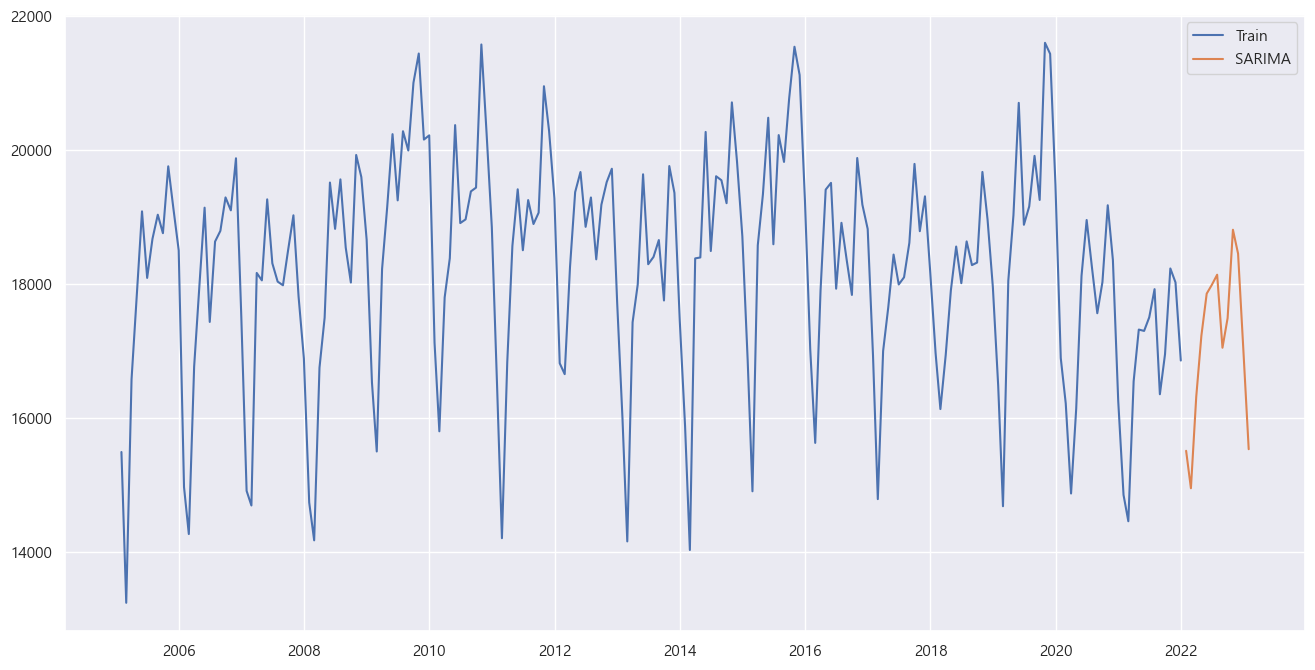

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train = df2.loc[:'2022-01-01']
test = df2.loc['2022-01-01':]

y_hat_ex = test.copy()

fit1 = SARIMAX(train['total'], order=(0, 0, 1),seasonal_order=(0,1,1,12),enforce_stationarity=False,enforce_invertibility=False).fit()
y_hat_ex['SARIMA'] = fit1.predict(start="2022-01-01", end="2023-01-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['total'], label='Train')
plt.plot(y_hat_ex['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

# 결론

코로나가 터진 이후로 교통사고가 많이 줄어든 것을 볼 수 있다. 


실제로 2021년에는 교통사고 사망자 수가 2000명 대로 역대 최저라고 한다. (https://www.joongang.co.kr/article/25059324#home)


ARIMA를 이용하여 올해 2022년 교통사고를 예측하였다.


기존 데이터와 마찬가지로 겨울에 낮은 사고를 예측하고 가을에 높은 사고를 예측함을 볼 수 있다.


2022년 데이터가 나오면 예측값과 비교해보고 성능을 확인한 후 다른 시계열 분석도 해보고 싶다.